### # 【AIコース】大課題 タイタニック生存予測 ランダムフォレスト

https://www.kaggle.com/startupsci/titanic-data-science-solutions

https://www.kaggle.com/c/titanic/data

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

https://docs.microsoft.com/ja-jp/azure/machine-learning/studio/algorithm-choice

https://datumstudio.jp/blog

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish

## 課題　タイタニックの生存予測
### 課題要件まとめ
- データ取得
- データ読み込み
- データ確認
- sample
- 前処理について記述せよ
- 2/前処理について記述せよ
- 前処理を行う
- 前処理の内容について記述せよ
- モデル選択について記述せよ
- モデル選択の基準
- モデル選択におけるデータ可視化
- データ可視化の結果について考察せよ
- データセットの分割
- ランダムフォレストについて記述せよ
- 学習
- accuracyを求めよ
- 精度を高める
- ハイパーパラメータについて
- チューニング
- 検証について記述せよ
- KFoldについて記述せよ
- KFoldを実施する
- Kfoldの結果を確認する
- どの特徴量が重要であったかを調査する

### 前処理について記述せよ
- 前処理とは何か
- なぜ前処理を行う必要があるのか
- 前処理は具体的に何を行うか(3つ以上記述せよ)
- 前述した具体的な前処理について、その前処理を行うと何を得ることができるか(記述したそれぞれの前処理例について記述せよ)

答え :
- 前処理とは何か
    - 前処理とは，オリジナルのサンプルデータを，学習の前に学習の効率を上げるために，適切な加工処理を行うことである。
- なぜ前処理を行う必要があるのか
    - 前処理を行う必要性はいくつかあり，生データのままでは学習ができないことや，異常な生データにより，予測性能が著しく下がることもある
- 前処理は具体的に何を行うか(3つ以上記述せよ)，その前処理を行うと何を得ることができるか
    1. 欠測値の削除と補完
        - 欠測値が混じっているとそもそも学習ができない
        - 欠測値を削除するとデータが少なくなってしまう場合は，欠測値を削除しないで補完する
    2. クラスラベルのエンコーディング
        - 文字データのままでは学習ができないあるいは誤変換を防ぐため予め数字に置換する
    3. 特徴量の尺度を揃える
        - 学習モデルによっては，特徴量をスケーリングしなければならない，また，スケーリングした方が最適化が上手くいくことも多い
    4. 正則化したりパラメータを減らす
        - 複雑さにペナリティを課したり，モデルを単純化することにより，過学習を防ぐ

### 2/前処理について記述せよ
- 前処理について記述せよの調査により、データを確認する際にどのような点を見るとよいか、3つ以上記述せよ。

答え :
1. カラムの数，データの数を確認する。各カラムについて欠測値の数を確認する
2. 各カラムの性格を確認する。それにより，欠測値の処理の方法や，外れ値の処理，クラス分けの方法などを決定する
3. 各カラムのデータの散らばりぐあいを確認して予測に適しているかを判断する
4. 各カラムどうしの干渉や強い相関があるかを確認して統合すべきところは統合する

### 前処理の内容について記述せよ
- simplify_ages
- simplify_cabins
- simplify_fares
- format_name
- drop_features
- encode_features
    - 以上のメソッドがそれぞれ何を行っているか記述せよ
    - それぞれなぜそのようなことを行っているか記述せよ(それによって得られるメリットまで考察すること)

答え :
- simplify_ages
    - 年齢の数値特徴量を順序特徴量に変換している。目的変数が生存 or not なので，説明変数が連続値であると説明が上手くいかなくなる
- simplify_cabins
    - Cabinカラムはユニーク数が147個と多く，また，欠測値も 1/4 ほどある。データの頭文字はアルファベットで残りは数字である（例外もある）。頭文字だけ残しユニーク数を大幅に減らして説明できるようにした。欠測値は'N'とした。
- simplify_fares
    - Ageカラムと同じ
- format_name
    - Nameカラムから，Family name と Title を独立させた。Titleはユニーク数が少ない。
- drop_features
    - 生存に関係なさそうな'Ticket', 'Name', 'Embarked'カラムを削除した。モデルを単純化できる。
- encode_features
    - クラスラベルのエンコーディングである。多くの学習ライブラリは，クラスラベルが整数値であることを要求する。内部で変換するものもあるが，それに頼らず，事前にエンコードした方がよい。

### モデル選択について記述せよ
- 今回は、生存予測（分類）を行いますが、この分類について使用できそうな手法を4つ以上しらべて記述せよ。
- その手法の概要をそれぞれ記述せよ
- その手法の長所/短所をそれぞれ3つずつ、記述したすべての手法において記述せよ

答え :
1. 決定木(Decision tree)
    - 概要：Yes/Noで答えられる質問で構成された階層的な木構造を学習する
    - 長所：結果のモデルが容易に可視化可能，データのスケールに対して不変，因果関係を説明しやすい
    - 短所：過学習になりやすい，外挿できない，精度100%にならないように必ずパラメータを設定する
2. ランダムフォレスト(Random Forest)
    - 概要：決定木のアンサンブル法である　複数の決定木の多数決を使います
    - 長所：データのスケールに対して不変，過学習になりにくい，パラメータのチューニングがほとんど不要
    - 短所：予測の過程を可視化しにくい，外挿できない，計算コストが高い
3. ナイーブベイズ(Naive Bayes)
    - 概要：クラスに対する統計値を個々の特徴量ごとに集めて，パラメータを学習する
    - 長所：計算が速い，訓練の過程が理解しやすい，高次元の疎なデータに対してもうまく機能する
    - 短所：汎化性能が少し劣る，すべての特徴量は独立でなければならない，アンダーフローが起きやすい
4. サポートベクターマシーン(SVM ; Support vector machine)
    - 概要：非線形モデルであるが高次の計算を減らす工夫がされている数学敵トリックの説明はかなり困難である
    - 長所：特徴量が多くても少なくても機能する，さまざまなデータに対して機能する，高次のデータにも機能する
    - 短所：サンプル数が多すぎると機能しない，パラメータ調整が難しい，予測がされた理由が理解するのが難しい

### モデル選択の基準
下記の参考資料を元に、どのような視点からモデルを選択すれば良いか、最低でも3つ以上の視点を記述すること(他の参考資料でも構わない、その場合参考資料を明記すること)

https://docs.microsoft.com/ja-jp/azure/machine-learning/machine-learning-algorithm-choice

https://datumstudio.jp/blog/機械学習におけるモデルの選択方法について

答え :
1. 予測精度の高/低と説明の容易/困難の対比
    - 予測精度の高いものは，ブラックボックスになりやすく説明が困難にある傾向があるそうです。この２つはトレードオフの関係になるようです。予測精度が高くて説明しやすいのは決定木ですが，その短所を解消したランダムフォレストは決定プロセスが表現しにくくなります（上のWEBはマチガイかも？）
2. テキストのような高次の疎なデータに対して機能するか
    - ランダムフォレストは高次のデータにうまく機能しない。高次のデータにうまく機能するのは，カーネルSVMなどがある
3. パラメータに対し頑健か敏感か
    - ランダムフォレストはパラメータチューニングなしでもうまく機能するので最も使われている。同じアンサンブル法であるブースティングはパラメータに敏感であると言われているがチューニングしだいではランダムフォレストより予測精度が高いそうである。多くのアルゴリズムはパラメータチューニングが必要である。
> Andreas C. Muller, Sarah Guido著「Pythonではじめる機械学習」

### データ可視化の結果について考察せよ
以下の観点をすべて含めて記述しましょう。

- 上記の２つの可視化から分かったことについて考察せよ。
- 上記の考察結果から、モデル選択を考える場合、どのようなことが考えられるか

答え :
- 上記の２つの可視化から分かったことについて考察せよ。
    - ２つのグラフから分かることは次である。女性は年齢に関係なく生存率が高いが，男性はある年齢層だけ生存率が高いという特徴がある。女性でも，Pclass=3は生存率が低い。男性は，Pclass=1だけ少し生存率が高い。
- 上記の考察結果から、モデル選択を考える場合、どのようなことが考えられるか
    - この２つの特徴量だけではモデル選択はできない
    - 特徴量の数が多くなく，データ数も多くなく，各特徴量も数段階に整理できるので，ランダムフォレストが十分機能すると考えられる。
    - AgeとClassの２つの特徴量によって生存率が大きく変化するので，Age\*Pclassのような特徴量を導入するとよい。

### ランダムフォレストについて記述せよ
以下の観点をすべて含めて記述しましょう。

- 決定木とはどのような手法か
- ランダムフォレストとはどのような手法か
- ランダムフォレストの長所と短所をそれぞれ3つ以上挙げてください。
- 今回の目的からランダムフォレストの手法が適する理由を考察し、記述せよ

答え :
- 決定木とはどのような手法か
    - Yes/Noで答えられる質問で構成された階層的な木構造を学習する。
- ランダムフォレストとはどのような手法か
    - 決定木のアンサンブル法である。複数の決定木の多数決を使っている。決定木の短所である過学習になりやすいところを解消している。
- ランダムフォレストの長所と短所をそれぞれ3つ以上挙げてください。
    - 長所：データのスケールに対して不変，過学習になりにくい，パラメータのチューニングがほとんど不要
    - 短所：予測の過程を可視化しにくい，外挿できない，計算コストが高い
- 今回の目的からランダムフォレストの手法が適する理由を考察し、記述せよ
    - 特徴量の数が多くなく，データ数も多くなく，各特徴量も数段階に整理できるので，ランダムフォレストが十分機能すると考えられる。また，パラメータチューニングが必要ないし，スケーリングも必要ないので使いやすい。

### ハイパーパラメータについて
- ハイパーパラメーターとは何か
- ランダムフォレストにおいてどのようなハイパーパラメーターがあるか4つ以上記述せよ
- 記述したハイパーパラメーターにおいて、それぞれどのような値が存在するか記述せよ（そのハイパーパラメーターを変化させるとどのようなことが起きるかも記述すること）

答え :
> ハイパーパラメーターとは何か

> 学習対象のパラメータとは違い，学習アルゴリズムじしんのパラメータであり，個別に最適化されるチューニングパラメータである。

1. criterion
    - 不純度の指標を選択する。“entropy”と“gini”から選択する。それぞれ定義式があり，情報量の計算に使われ，分岐条件に影響を与える。
2. n_estimators
    - 決定木の数。大きいほうがよいが予測精度が良いが，計算コストが増大する。
3. max_features
    - 各決定木で分類に使用する説明変数の数。個々の決定木の乱数性を決定するとともに，小さくなると過学習が低減する。
4. max_depth
    - 木構造の深さ。精度100%になるくらい深くすると，明らかに過学習である。

### 検証について記述せよ
以下の観点をすべて含めて記述しましょう。

- 検証とは何か
- なぜ検証を行う必要があるのか(Accuracyだけではダメな理由も含めること)
- 主な検証方法について2つ以上記述せよ

答え :
- 検証とは何か
    - 学習データにより学習させた結果についてテストデータについても予測精度が保たれているかをテストすること。
- なぜ検証を行う必要があるのか(Accuracyだけではダメな理由も含めること)
    - 学習データで予測精度を高くすることは比較的簡単であるが，未知のデータについても予測精度が保たれていなければならない。このことを汎化性能（能力）が高いという。検証とは，汎化性能（能力）をテストデータで確認することである。
    - このときの評価として，タイタニックではAccuracy（正解率）が適当である。理由は，False negative, False positive つまり，マチガイが少ないほうがよいからである。課題によっては，Precission（適合率）またはRecall（再現率）のほうが適当な場合がある。    
    - いずれにしても，訓練データもテストデータも同じ評価基準をつかい，汎化性能を検証します。
- 主な検証方法について2つ以上記述せよ
    - ホールドアウト法
    > 元のデータセットをトレーニングデータとテスタデータに分割します。トレーニングデータセットはモデルのトレーニングに使用され、テストデータセットはモデルの性能を評価するために使われます。
    - k分割交差検証
    > データをK個に分割します。そして、そのうちの1つをテストとし、残る K−1 個のデータを学習用データとします。K個のデータ分割はランダムになります。そして、データ分割が完了したら、実際にK-1のデータセットで学習を行い、1つに分割されたテストデータでテストを行います。この学習、テストの作業を分割されたK個のそれぞれのデータの組み合わせに対してK回繰り返します。

### KFoldについて記述せよ

- K-分割交差検証について説明せよ
- K-分割交差検証はデータセットを何個に分割するか
- データセットを分割する際、その個数はどのように考えると良いか
- K-分割交差検証は何回の検証を行うか
- K-分割交差検証の結果は、最終的にどのように求められるか

答え :
- K-分割交差検証について説明せよ
    - データをK個に分割します。そして、そのうちの1つをテストとし、残る K−1 個のデータを学習用データとします。K個のデータ分割はランダムになります。そして、データ分割が完了したら、実際にK-1のデータセットで学習を行い、1つに分割されたテストデータでテストを行います。この学習、テストの作業を分割されたK個のそれぞれのデータの組み合わせに対してK回繰り返します。
- K-分割交差検証はデータセットを何個に分割するか
    - K個
- データセットを分割する際、その個数はどのように考えると良いか
    - K=10が標準である。Kを増やすと計算コストが増えるが汎化性能が良くなる。Kを減らすと増やしたときと逆になる。
- K-分割交差検証は何回の検証を行うか
    - K回
- K-分割交差検証の結果は、最終的にどのように求められるか
    - 最後にそれぞれの回で導き出した精度を平均化させます。

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

### データの取得

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# combine = [data_train, data_test]
# tt_df = pd.concat([data_train, data_test])

In [3]:
# print(data_train.columns.values)
data_train.head()
data_train.tail()
data_train.head(5)

# data_train.describe(include=['O'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


オリジナルのテストデータには'Survived'カラムがない

In [5]:
print(data_train.info())
print('_'*40)
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

In [6]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cleaver, Miss. Alice",male,1601,G6,S
freq,1,577,7,4,644


### 前処理

In [8]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

# data_train.describe(include=['O'])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


### ラベルエンコード

In [9]:
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


### データの可視化

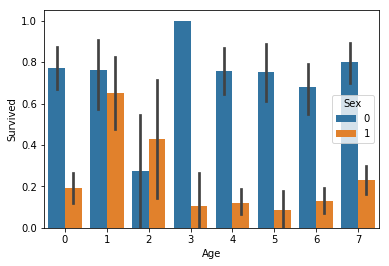

In [10]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

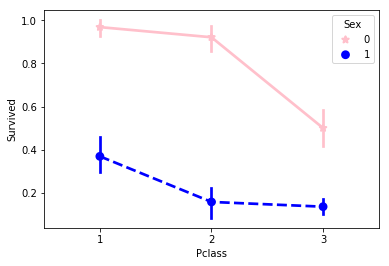

In [11]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={1: "blue", 0: "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

### データ分割（オリジナルの学習データからテストデータを分割）

In [12]:
X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size=0.20, 
                                                    random_state=23)

### ランダムフォレスト（適当なパラメータ）

In [13]:
clf = RandomForestClassifier(max_depth=15, 
                             criterion='entropy', 
                             random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.810055865922


### グリッドサーチ（パラメータチューニング）

In [15]:
clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt', 'auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

grid_obj = GridSearchCV(estimator=clf,         # RandomForestClassifier()
                        param_grid=parameters, # above
                        scoring='accuracy', 
                        cv=3                   # default 3-fold
                       )
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train, y_train) # これって必要？

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
print('Accuracy score: {:.3f}'.format(grid_obj.score(X_test, y_test)))
print('Accuracy score: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy score: 0.838
Accuracy score: 0.838


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test)
print('Accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {:.3f}'.format(f1_score(y_test, y_pred)))

Accuracy score: 0.838
Precision score: 0.769
Recall score: 0.781
F1 score: 0.775


In [18]:
CM = confusion_matrix(y_test, y_pred)
print(CM)
# 死亡 = 0 = negative, 生存 = 1 = positive
# [[TN  FP]   # 実際に死亡
#  [FN  TP]]  # 実際に生存
TN, FP, FN, TP = CM[0,0], CM[0,1], CM[1,0], CM[1,1]
print("TN = {}, FP = {}, FN = {}, TP = {}".format(TN, FP, FN, TP))

[[100  15]
 [ 14  50]]
TN = 100, FP = 15, FN = 14, TP = 50


In [19]:
Accuracy = (TP + TN) / (TN + FP + FN + TP) # 正解率
Precission = TP / (TP + FP)                # 適合率
Recall = TP / (TP + FN)                    # 再現率
F1 = 2 * (Precission * Recall) / (Precission + Recall)
print('Accuracy score: {:.3f}'.format(Accuracy))
print('Precision score: {:.3f}'.format(Precission))
print('Recall score: {:.3f}'.format(Recall))
print('F1 score: {:.3f}'.format(F1))

Accuracy score: 0.838
Precision score: 0.769
Recall score: 0.781
F1 score: 0.775


### 決定木との比較（適当なパラメータ）

In [20]:
tree_clf = DecisionTreeClassifier(max_depth=15, 
                                  criterion='entropy',
                                  random_state=0)
tree_clf.fit(X_train,y_train)

y_pred = tree_clf.predict(X_test)
print('Accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy score: 0.782


### 特徴量の重要度

In [21]:
clf.feature_importances_

array([ 0.11080824,  0.21412457,  0.08237468,  0.04812069,  0.03613118,
        0.06930037,  0.06609916,  0.23326521,  0.13977589])

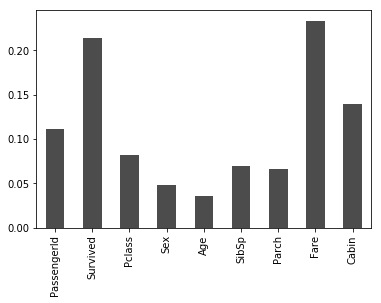

In [22]:
data = pd.Series(clf.feature_importances_, index=list(data_train.columns[:9]))
data.plot(kind='bar', color = 'k', alpha=0.7)

### クロスバリデーション（グリッドサーチの結果を基に）

In [23]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, 
              shuffle=True, # 分類ではシャッフルする
              random_state=0
             )

scores = cross_val_score(estimator=clf,
                         X=X_all,
                         y=y_all,
                         scoring='accuracy',
                         cv=kfold) # KFoldを使ってクロスバリデーション
# print('R^2: {}'.format(scores))
print('accuracy: {}'.format(np.round(scores,3)))
print('accuracy: Mean{:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))

accuracy: [ 0.856  0.854  0.865  0.798  0.865  0.82   0.809  0.843  0.787  0.865]
accuracy: Mean0.836 +/- 0.029


### オリジナルのテストデータに'Survived'を合体

In [24]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
# output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
